<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno: Vicente Bórquez Z.


### **Link de repositorio de GitHub:** `http://....`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?. 

### EDA


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [3]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="EDA")
profile.to_notebook_iframe()

c:\Users\borqu\anaconda3\envs\LabPC\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\borqu\anaconda3\envs\LabPC\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Estudiando y extrayendo información del EDA previo, hay varios comentarios que corresponde realizar:

1. No hay datos nulos, por lo que no será necesario considerar dichoas casos.
2. Hay 3971 filas duplicadas, estas serán eliminadas.
3. La columna que determina la clase "Diabetes" está perfectamente balanceada (¿Ha habido alguna manipulación previa de los datos?)
4. Dado que no hay un README que explique las columnas, se asume (tanto por el nombre como por la cantidad de valores posibles) que las siguientes son variables categóricas:
    * 'Sex'
    * 'HighChol'
    * 'CholCheck'
    * 'Smoker'
    * 'HeartDiseaseorAttack'
    * 'PhysActivity'
    * 'Fruits'
    * 'Veggies'
    * 'HvyAlcoholConsump'
    * 'GenHlth'
    * 'DiffWalk'
    * 'Stroke'
    * 'HighBP'
5. De las anteriores, la única que no es binaria 1.0-0.0 (y por ende se le debiera aplicar OneHotEncoding) es 'GenHlth'.
6. Las columnas 'Age' y 'BMI' toman valores reales y su distribución es cercana a la normal. Esto último es en base a una inspección visual. Por ello, a estas se les aplicará una normalización entre 0 y 1 estándar.
7. Las columnas 'MentHlth' y 'PhysHlth' toman valores naturales entre 0 y 30 (ambos incluídos). Estos valores se escalaran entre 0 y 1 utilizando un `minmaxscaler` para mantener así la distribución de los datos. No obstante todo lo dicho, es posible que estas columnas en realidad correspondan a 30 clasificaciones distintas (asumiendo 0 un caso en el que no se tiene información), por lo que podría tratarse de variables categóricas, en cuyo caso la transformación a aplicar sería incorrecta. Se deja esto como potencial futuro punto a tratar si se considera pertinente.


En base a estos comentarios, se procede con la limpieza, transformaciones y ajuste de clasificador:
   

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
import numpy as np
from sklearn import set_config

set_config(transform_output="pandas")

In [4]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [5]:
# duplicados
df_clean = df.drop_duplicates()

binary_vars = [
    'Sex',
    'HighChol',
    'CholCheck',
    'Smoker',
    'HeartDiseaseorAttack',
    'PhysActivity',
    'Fruits',
    'Veggies',
    'HvyAlcoholConsump',
    'DiffWalk',
    'Stroke',
    'HighBP'
] 
categorical_vars = [    
    'GenHlth'
    
]

normal_vars = [
    'Age',
    'BMI'
]

minmax_31_vars = [
    'MentHlth',
    'PhysHlth'
]


Col_Transformer = ColumnTransformer(
    transformers=[
        ('passthrough', 'passthrough', binary_vars),
        ('OneHotEncoder', OneHotEncoder(sparse = False),  categorical_vars),
        ('Normal_NumTransform', StandardScaler(), normal_vars),
        ('31_different_NumTransform', MinMaxScaler(), minmax_31_vars),        
        ])

df_preprocesado = Col_Transformer.fit_transform(df_clean)
df_preprocesado.head(4)

c:\Users\borqu\anaconda3\envs\LabPC\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,passthrough__Sex,passthrough__HighChol,passthrough__CholCheck,passthrough__Smoker,passthrough__HeartDiseaseorAttack,passthrough__PhysActivity,passthrough__Fruits,passthrough__Veggies,passthrough__HvyAlcoholConsump,passthrough__DiffWalk,...,passthrough__HighBP,OneHotEncoder__GenHlth_1.0,OneHotEncoder__GenHlth_2.0,OneHotEncoder__GenHlth_3.0,OneHotEncoder__GenHlth_4.0,OneHotEncoder__GenHlth_5.0,Normal_NumTransform__Age,Normal_NumTransform__BMI,31_different_NumTransform__MentHlth,31_different_NumTransform__PhysHlth
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,-1.610595,-0.573373,0.166667,1.000000
1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.185929,-0.573373,0.000000,0.000000
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.535495,-0.573373,0.000000,0.333333
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.836364,-0.298937,0.000000,0.100000


In [6]:
df_preprocesado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64020 entries, 0 to 70691
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   passthrough__Sex                     64020 non-null  float64
 1   passthrough__HighChol                64020 non-null  float64
 2   passthrough__CholCheck               64020 non-null  float64
 3   passthrough__Smoker                  64020 non-null  float64
 4   passthrough__HeartDiseaseorAttack    64020 non-null  float64
 5   passthrough__PhysActivity            64020 non-null  float64
 6   passthrough__Fruits                  64020 non-null  float64
 7   passthrough__Veggies                 64020 non-null  float64
 8   passthrough__HvyAlcoholConsump       64020 non-null  float64
 9   passthrough__DiffWalk                64020 non-null  float64
 10  passthrough__Stroke                  64020 non-null  float64
 11  passthrough__HighBP         

### Modelo y Ajuste

In [6]:
#!pip install xgboost
import xgboost as xgb

In [7]:
# Ahora el split train/test:

from sklearn.model_selection import train_test_split, GridSearchCV

features = df_clean.drop(['Diabetes'], axis=1)
labels = df_clean['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, shuffle=True, stratify=labels, random_state=42
)

In [9]:
#Ahora el clasificador en el pipeline y búsqueda de parámetros con gridsearch:

XGB_pipe = Pipeline([
    ("preprocesamiento", Col_Transformer), 
    ('xgb', xgb.XGBClassifier())
])

param_grid = [{
    'xgb__max_depth': [2, 3, 5, 7, 10],
    'xgb__n_estimators': [10, 100, 500],
}]

grid = GridSearchCV(XGB_pipe, param_grid=param_grid)

In [12]:
%%time

grid.fit(X_train, y_train)

c:\Users\borqu\anaconda3\envs\LabPC\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\borqu\anaconda3\envs\LabPC\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\borqu\anaconda3\envs\LabPC\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\borqu\anaconda3\envs\LabPC\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output`

CPU times: total: 16min 15s
Wall time: 1min 35s


GridSearchCV(estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         ['Sex',
                                                                          'HighChol',
                                                                          'CholCheck',
                                                                          'Smoker',
                                                                          'HeartDiseaseorAttack',
                                                                          'PhysActivity',
                                                                          'Fruits',
                                                                          'Veggies',
                                                                          'HvyAlcoholConsump',
                                                                          'DiffWalk',
                                                                          'Stroke',
                                                                          'HighBP']),
                                                                        ('OneHotEncoder',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['GenHlth']),
                                                                        ('Normal_NumTransform',
                                                                         St...
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid=[{'xgb__max_depth': [2, 3, 5, 7, 10],
                          'xgb__n_estimators': [10, 100, 500]}])

In [13]:
mean_score = grid.cv_results_["mean_test_score"][grid.best_index_]
std_score = grid.cv_results_["std_test_score"][grid.best_index_]

grid.best_params_, mean_score, std_score

print(f"Best parameters: {grid.best_params_}")
print(f"Mean CV score: {mean_score: .6f}")
print(f"Standard deviation of CV score: {std_score: .6f}")

Best parameters: {'xgb__max_depth': 2, 'xgb__n_estimators': 100}
Mean CV score:  0.739445
Standard deviation of CV score:  0.004583


In [8]:
#Usando los mejores parámetros obtenidos:
modelF = xgb.XGBClassifier(max_depth = 2, n_estimators = 100)
XGB_pipe_F = Pipeline([
    ("preprocesamiento", Col_Transformer), 
    ('xgb', modelF)
])
XGB_pipe_F = XGB_pipe_F.fit(X_train, y_train)
y_pred = XGB_pipe_F.predict(X_test)

c:\Users\borqu\anaconda3\envs\LabPC\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print("Matriz de confusión\n", confusion_matrix(y_test, y_pred), "\n")
print("\nMétricas\n",classification_report(y_test, y_pred))


Matriz de confusión
 [[6940 3165]
 [2364 8658]] 


Métricas
               precision    recall  f1-score   support

         0.0       0.75      0.69      0.72     10105
         1.0       0.73      0.79      0.76     11022

    accuracy                           0.74     21127
   macro avg       0.74      0.74      0.74     21127
weighted avg       0.74      0.74      0.74     21127



Comentarios:

Si se considera que las clases estaban balanceadas originalmente (las filas duplicadas y borradas representaban menos delo 6% del total), entonces el clasificador es aceptable cuando no se toma en cuenta el contexto de uso, pues todas las métricas tienen un valor de 0.7 +/- 0.04, lo que es considerablemente mejor que un predictor al azar (que reportaría métricas de ~0.5). 

No obstante, el caso de uso es de salud de personas y se cuenta con 3165 casos de falsos negativos, lo que términos globales implica una recall de 0.69 para la clase negativa, es decir, en caso de que una persona tenga diabetes, utilizando este predictor, tiene un 31% de probabilidades de que se le entregue una mala predicción indicando que no hay diabetes. Lo anterior es muy grave, pues se pondría en riesgo la salud de una cantidad importante de personas dada una mala predicción, por todo lo anterior, se considera que es un mal predictor para el caso de uso del Dr. Simi.


## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

In [16]:
modelw = xgb.XGBClassifier(max_depth = 2, n_estimators = 100, importance_type = 'weight')
XGB_pipe_Fw = Pipeline([
    ("preprocesamiento", Col_Transformer), 
    ('xgb', modelw)
])
XGB_pipe_Fw = XGB_pipe_Fw.fit(X_train, y_train)

modelc = xgb.XGBClassifier(max_depth = 2, n_estimators = 100, importance_type = 'cover')
XGB_pipe_Fc = Pipeline([
    ("preprocesamiento", Col_Transformer), 
    ('xgb', modelc)
])
XGB_pipe_Fc = XGB_pipe_Fc.fit(X_train, y_train)


modelg = xgb.XGBClassifier(max_depth = 2, n_estimators = 100, importance_type = 'gain')
XGB_pipe_Fg = Pipeline([
    ("preprocesamiento", Col_Transformer), 
    ('xgb', modelg)
])
XGB_pipe_Fg = XGB_pipe_Fg.fit(X_train, y_train)

c:\Users\borqu\anaconda3\envs\LabPC\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\borqu\anaconda3\envs\LabPC\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\borqu\anaconda3\envs\LabPC\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
modelw.feature_importances_

array([0.05369128, 0.04362416, 0.04026845, 0.01677852, 0.03020134,
       0.0033557 , 0.0033557 , 0.01677852, 0.03691275, 0.01342282,
       0.02684564, 0.03020134, 0.05033557, 0.03020134, 0.        ,
       0.04697987, 0.03020134, 0.15436241, 0.22818792, 0.06040268,
       0.08389262], dtype=float32)

In [17]:
modelc.feature_importances_

array([0.02795219, 0.04247823, 0.07887977, 0.01751474, 0.04024345,
       0.00021101, 0.00136663, 0.08175839, 0.0752151 , 0.03381307,
       0.06146711, 0.04478306, 0.06378222, 0.06175466, 0.        ,
       0.05914197, 0.07629859, 0.05509584, 0.0690994 , 0.05367709,
       0.0554674 ], dtype=float32)

In [18]:
modelg.feature_importances_

array([0.00748072, 0.09213161, 0.01641416, 0.00085547, 0.02492129,
       0.00105258, 0.00145383, 0.00330413, 0.01711285, 0.14723438,
       0.00531988, 0.3661385 , 0.06376835, 0.12780975, 0.        ,
       0.0276876 , 0.03151433, 0.0339239 , 0.0276386 , 0.00238143,
       0.00185663], dtype=float32)

In [17]:
%matplotlib inline
from xgboost import plot_importance
import matplotlib.pyplot as plt
from matplotlib import pyplot

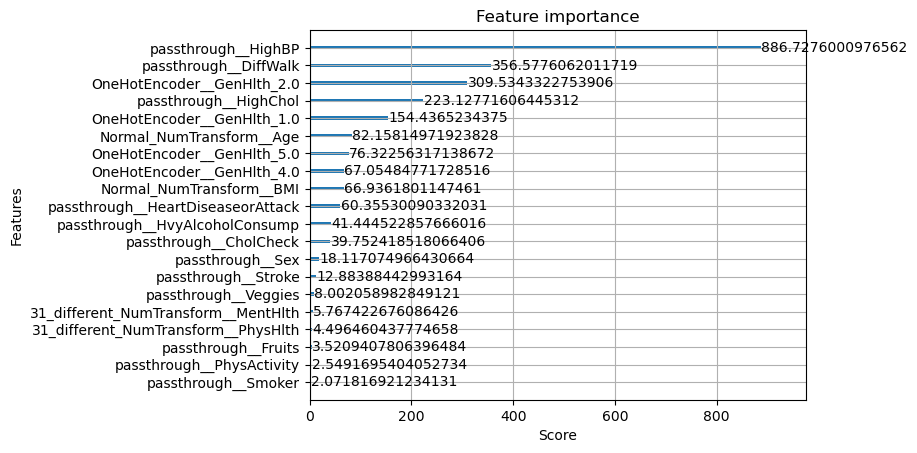

In [18]:
plot_importance(modelg, xlabel='Score',  importance_type='gain')
plt.show()

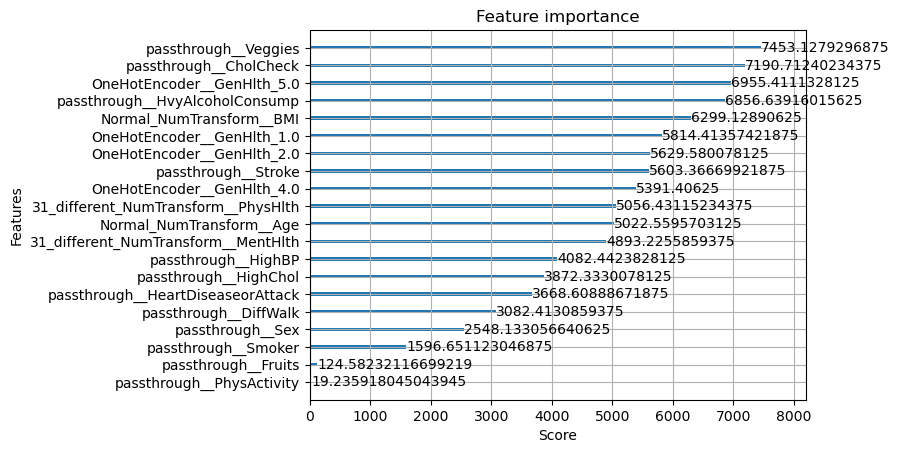

In [19]:
plot_importance(modelc, xlabel='Score', importance_type='cover')
plt.show()

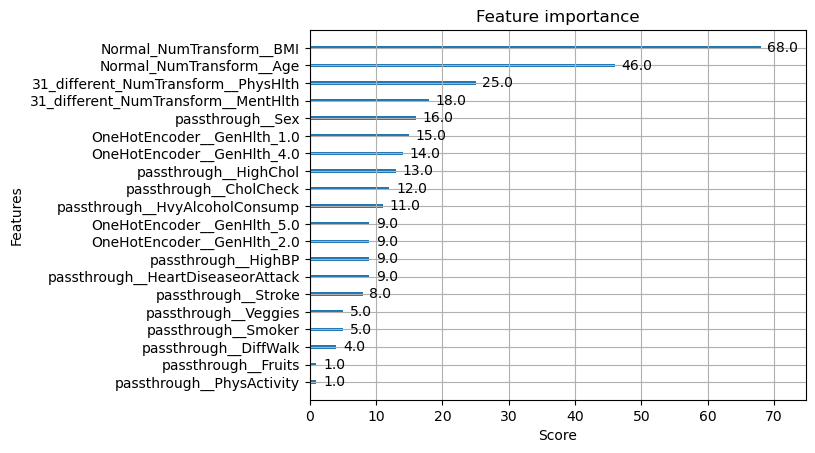

In [20]:
plot_importance(modelw, xlabel='Score', importance_type='weight')
plt.show()

Los resultados no son compatibles entre los modelos, tanto porque los valores de importancia de las features se tienen en distinatas escalas, como porque el orden de features según su importancia varía de acuerdo al tipo de importancia escogido, de hecho, no existe ninguna feature presente en el top 5 de variables más importantes en los 3 modelos de manera simultánea.

Finalmente, hay que aclarar que la interpretabilidad de un modelo de árbol (o árboles/bosques como este caso) no depende únicamente de las importancias de las features, sino que también de la estructura y lógica interna del(los) árbol(es). De manera directamente relacionada con lo anteriormente dicho, una debilidad de este método es que se desconocen las decisiones internas de cada nodo de cada árbol, por lo que no se puede obtener una interpretación precisa de cada feature al momento de la decisión de cada modelo.

## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [10]:
from sklearn.metrics import f1_score

print('F1 score Base : ', f1_score(y_test, XGB_pipe_F.predict(X_test)))

def apply_permute(features, labels, pipeline, N_perms):
    F1_base = f1_score(labels, pipeline.predict(features))
    F1_scores = {}
    Stds = {}
    for col in features.columns:
        F1_scores[col] = []
    for n in range(N_perms):
        for col in features.columns:
            features_copy = features.copy()
            shuffled_col = np.random.permutation(features_copy[col])
            features_copy[col] = shuffled_col
            labels_pred = pipeline.predict(features_copy)
            F1_scores[col].append(F1_base - f1_score(labels, labels_pred))
    for col in features.columns:
        Stds[col] = np.std(F1_scores[col])

    return F1_scores, Stds

F1 score Base :  0.7579776756401837


In [11]:
F1_scores, Stds = apply_permute(X_test, y_test, XGB_pipe_F, 30)

In [12]:
Stds = dict(sorted(Stds.items(), key=lambda x: x[1], reverse=True))

# Imprimir el diccionario ordenado
for clave, valor in Stds.items():
    print(clave, valor)

GenHlth 0.001830585314619793
BMI 0.0018118832021452845
Age 0.001768211004320631
HighBP 0.0011423486296981828
HighChol 0.001076384552105453
DiffWalk 0.0008097886188942633
HvyAlcoholConsump 0.0007480637375691665
HeartDiseaseorAttack 0.0006927479046559716
Sex 0.0006210986590250299
CholCheck 0.0005966439943771746
MentHlth 0.0005769986291033422
PhysHlth 0.0005180927439391964
Veggies 0.0005109139399572721
Stroke 0.00040869747939327645
Smoker 0.000176280245380324
Fruits 3.821680707830791e-05
PhysActivity 3.130297949375509e-05


#### Respuestas:

**¿Cómo mide la importancia de las features su propuesta?**

Primero se obtiene una métrica base de la predicción del modelo ya entrenado sobre datos de test. En este caso es F1 score con valor de 0.758. Luego, cada columna en las features de test es permutada aleatoriamente sin modificar las demás columnas, a continuación se realizan las predicciones, se calcula la nueva métrica F1 score, se computa la diferencia entre esta obtenida y la base guardada; finalmente, se almacena esta diferencia. Esto se hace 30 veces por columna. A continuación, se obtiene la desvicación estándar de las diferencias acumuladas, mientras mayor sea esta desviación, mayor será la importancia de la feature variada, pues la varianza de las diferencias será mayor, indicando que esta feature en particular es considerada en mayor medida al momento de realizar la clasificación.

**¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?**

1. 'GenHlth': Asumiendo que esta columna corresponde a 'Salud general', es razonable suponer que esta sea la columna que más interfiera en la predicción, pues mala salud en general suele estar acompañada de malos hábitos alimenticios, baja actividad física y/o ser propenso a enfermedades, lo que en conjunto puede ser un indicador esperable de alguna probabilidad de tener una enfermedad como la diabetes.

2. 'BMI': El índice de masa corporal es el la segunda feature de mayor impacto. Tiene mucho sentido, ya que hay un tipo de diabetes que puede ser adquirida a lo largo de los años después de llevar constantemente malos hábitos alimenticios, lo que a su vez tendería a tener una correlación directa con el BMI.

3. 'HighBP': Entendiendo esta columna como 'Alta presión arterial', es la tercera feature que más influye e igualmente tiene sentido su presencia en este ranking. Si bien es cierto la alta presión arterial (o hipertensión) es un factor de riesgo para enfermedades cardiobvasculares y la diabetes **no** es una enfermedad de este tipo,  ambas condiciones *diabetes* e *hipertensión* a menudo están relacionadas y tienen factores de riesgo comunes.

4. 'Age': La cuarta feature más importante es la edad. Esta también tiene mucho sentido, pues la diabetes es más comun en personas de mayor edad y la diabetes de tipo 2 (la más común) suele aparecer conforme las personas envejecen y a lo largo de los años pierden sensibilidad a la insulina hasta finalmente desarrollar esta enfermedad.

5. 'HighChol': Es la quinta feature más relevante. Asumiendo que esta columna representa la presencia o ausencia de colesterol, entonces, por el mismo motivo que en el caso de la hipertensión, si tiene sentido su presencia en este ranking. Esto porque, aunque el alto colesterol no es causa ni factor de riesgo directo de la diabetes, si se puede decir que ambas comparten factores de riesgo comunes.

**¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?**

Ahora se tiene una mejor interpretabilidad, pues hay una métrica base sobre la que se compara, así como una mejor explicación de las features escogidas.

**Nombre y explique 3 ventajas y 3 desventajas del método implementado.**

- Ventajas:

1. Interpretabilidad: El método de permutación entrega una medida directa de la importancia relativa de las features al evaluar cómo afecta la permutación de una feature en el rendimiento del modelo. Esto facilita la interpretación de la contribución de cada feature en la predicción del modelo.

Independencia del modelo: El método de permutación no está vinculado a un modelo de aprendizaje específico. Puede aplicarse a cualquier modelo predictivo y no requiere conocer los detalles internos del modelo.

Sensibilidad a relaciones no lineales y de interacción: El método de permutación puede capturar relaciones no lineales y de interacción entre las features. Al permutar una feature, se evalúa el impacto en el rendimiento del modelo, lo que permite detectar dependencias y patrones complejos entre las features y la variable objetivo.

- Desventajas:

Costo computacional: El método de permutación puede ser computacionalmente costoso, especialmente para conjuntos de datos grandes y modelos complejos. Para obtener estimaciones precisas de la importancia de las features, se requiere realizar múltiples permutaciones para cada feature, lo que puede requerir tiempo y recursos computacionales significativos.

Sesgo hacia features correlacionadas: El método de permutación puede tener dificultades para discriminar entre features altamente correlacionadas. Si dos o más features están fuertemente correlacionadas entre sí, la permutación de una de ellas puede no tener un impacto sustancial en el rendimiento del modelo debido a la existencia de otras features redundantes.

Limitaciones en datos desbalanceados: El método de permutación puede presentar limitaciones en conjuntos de datos desbalanceados, donde la proporción de ejemplos de una clase es mucho mayor que la de otra. En estos casos, la permutación de una feature puede tener un impacto limitado en el rendimiento del modelo si la clase minoritaria está mal representada en los datos de entrenamiento.

## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [32]:
#!pip install shap

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ------------------------------------- 435.6/435.6 kB 13.7 MB/s eta 0:00:00


In [13]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [14]:
import shap
import numpy as np
import sklearn

In [17]:
explainer = shap.Explainer(XGB_pipe_F.predict, X_train)

In [18]:
shap_values = explainer(X_test)

Permutation explainer: 21128it [1:09:17,  5.06it/s]                           


Cada *shap value* para una característica en una instancia (paciente) específica representa la contribución promedio que dicha característica proporciona a la predicción final del modelo.

* Un valor SHAP positivo indica que la presencia de esa característica aumenta la predicción en comparación con el valor de referencia o línea base.
* Un valor SHAP negativo indica que la presencia de esa característica disminuye la predicción en comparación con el valor de referencia o línea base.
* Cuanto mayor sea el valor absoluto de un valor SHAP, mayor será la influencia de la característica en la predicción.

### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? 
- ¿Existe algún patrón común entre las instancias analizadas? 
- ¿Es posible generalizar estas conclusiones a todo el dataset?

Class predicted for instance 1 : 1
True class : 1.0


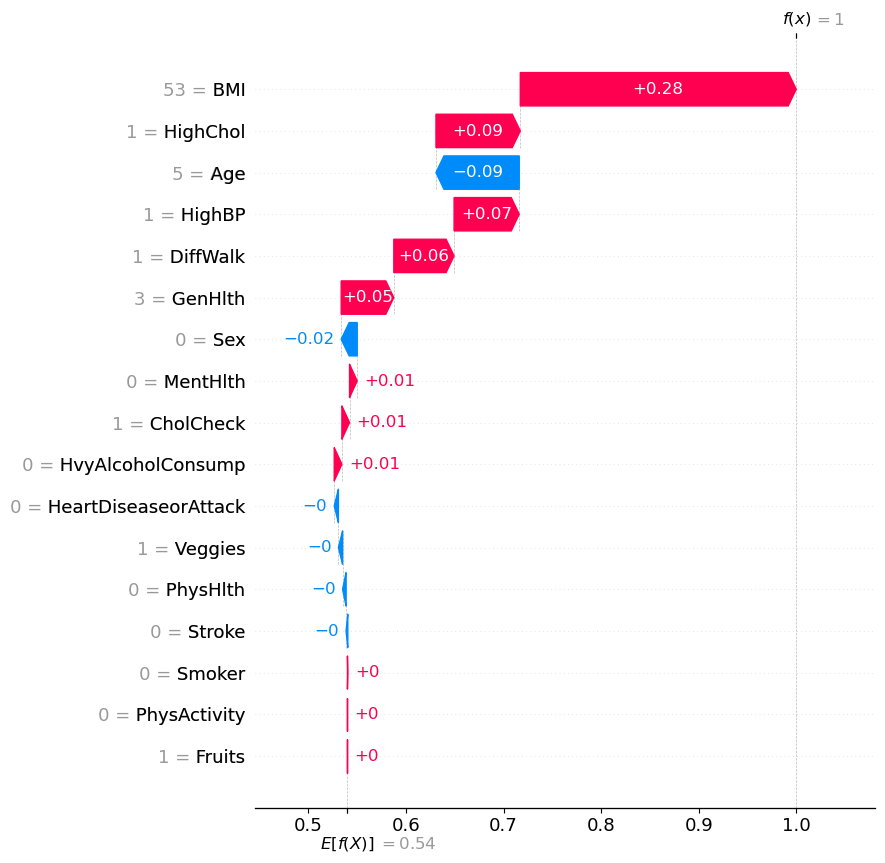

In [82]:
inst = 1
print('Class predicted for instance {} : {}'.format(inst, y_pred[inst]))
print('True class : {}'.format(y_test.iloc[inst]))
shap.plots.waterfall(shap_values[inst], max_display=len(X_test.columns))

- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? 
En esta instancia:
    * Afectan positivamente: BMI, HighChol, HighBP, DiffWalk, GenHlth, MentHlth, CholCheck y HvyAlcoholConsump
    * Afectan Negativamente: Age y Sex

Class predicted for instance 9 : 1
True class : 1.0


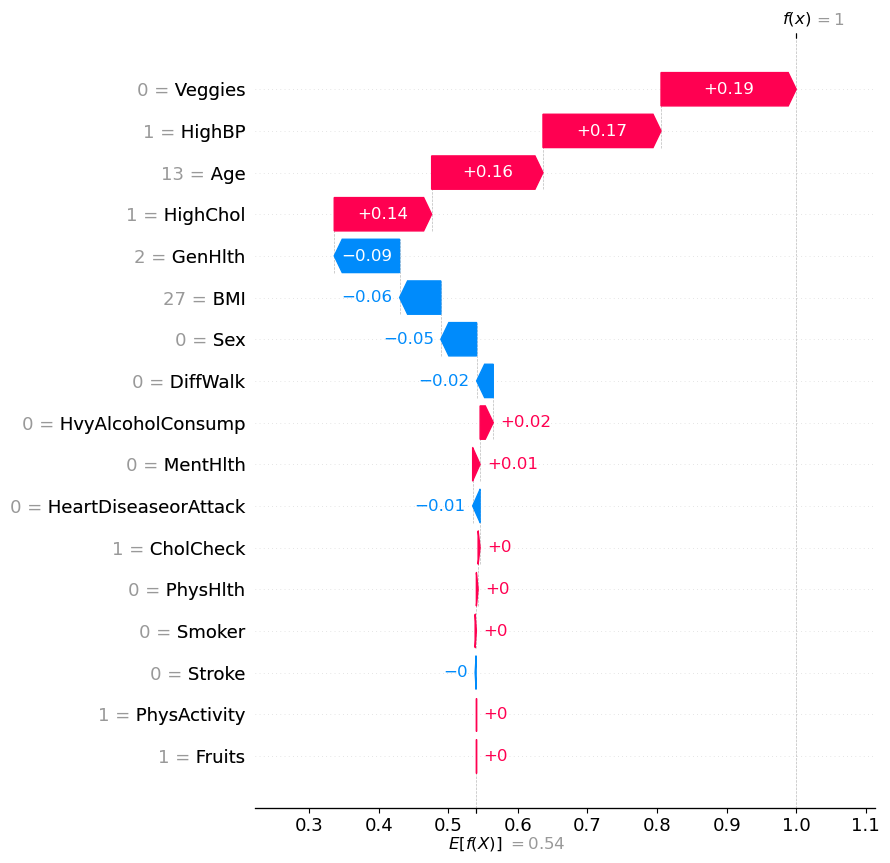

In [83]:
inst = 9
print('Class predicted for instance {} : {}'.format(inst, y_pred[inst]))
print('True class : {}'.format(y_test.iloc[inst]))
shap.plots.waterfall(shap_values[inst], max_display=len(X_test.columns))

- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? 
En esta instancia:
    * Afectan positivamente: Veggies, HighBP, Age, HighChol, HvyAlcoholConsump y MentHlth. 
    * Afectan Negativamente: GenHlth, BMI, Sex, DiffWalk y HeartDiseaseorAttack. 

Class predicted for instance 150 : 0
True class : 0.0


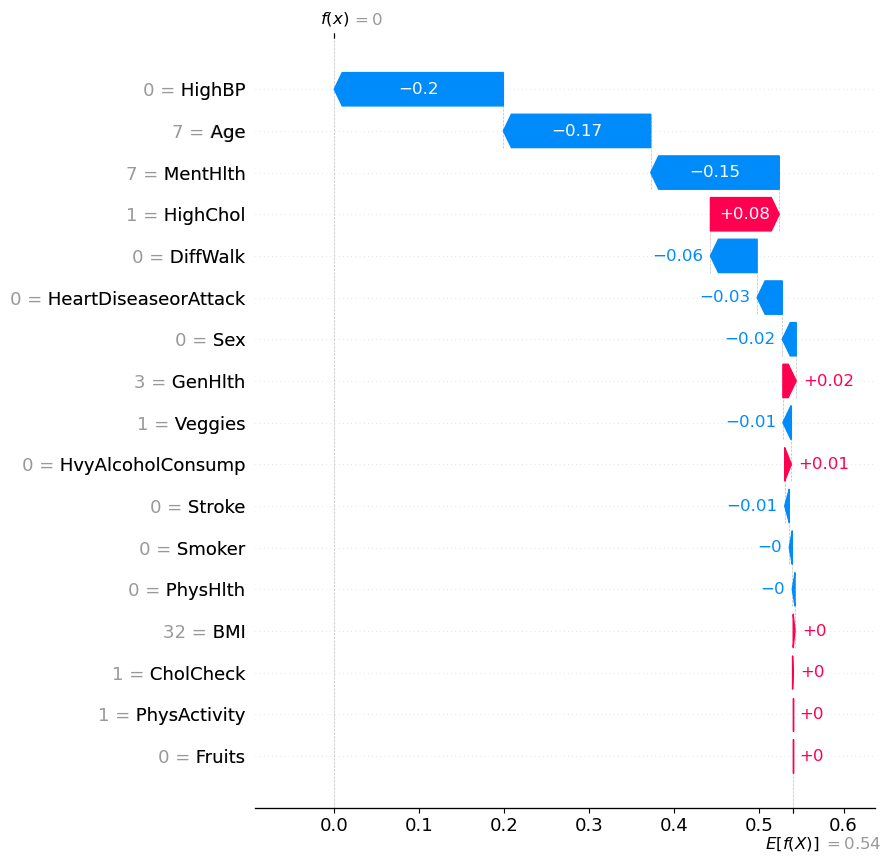

In [84]:
inst = 150
print('Class predicted for instance {} : {}'.format(inst, y_pred[inst]))
print('True class : {}'.format(y_test.iloc[inst]))
shap.plots.waterfall(shap_values[inst], max_display=len(X_test.columns))

- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? 
En esta instancia:
    * Afectan positivamente: HighChol, GenHlth y HvyAlcoholConsump.
    * Afectan Negativamente: HighBP, Age, MentHlth, DiffWalk, HeartDiseaseorAttack, Sex, Veggies y Stroke.

- ¿Existe algún patrón común entre las instancias analizadas? 

1. En todas las instancias, Sex = 0 afectó negativamente (pero no de igual forma) la clasificación. 
2. En todas las instancias, HighChol = 1 afectó de manera positiva (pero no de igual forma) la clasificación.
3. En todas las instancias, HvyAlcoholConsump = 0 afectó de manera positiva  (pero no de igual forma) la clasificación, pero su influencia es lo suficientemente pequeña (+0.01 o +0.02), que no es seguro hacer suposiciones al respecto.
4. Fruits, PhysActivity, PhysHlth, Smoker Nunca influyeron en la clasificación.

- ¿Es posible generalizar estas conclusiones a todo el dataset?

Siendo tan pocas observaciones (3 de 21127), no sería seguro generalizar lo observado

### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

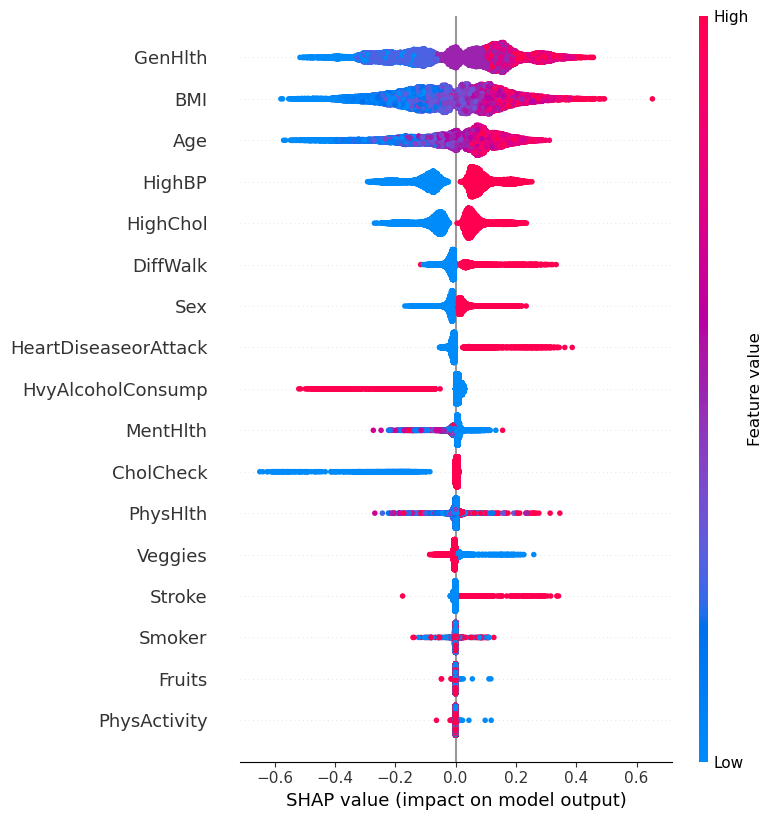

In [87]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

- ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

    * Ahora no hay columnas que nunca influyan en la clasificación, aunque si vale la pena mencionar que (a simple vista) Fruits y PhysActivity solamente influyen en muy pocos casos (u outliers).
    * A primera vista, hay variables como Sex, HeartDiseaseorAttack, HighBP o HighChol para las que su valor binario (1 o 0) influye siempre del mismo modo (1 influye de manera positiva y 0 de manera negativa).

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [110]:
import random
random.seed(42)  
subsample_indices = random.sample(range(len(X_test)), 1000)
X_subsample = X_test.iloc[subsample_indices]
y_pred_subsample = XGB_pipe_F.predict(X_subsample)


selected_features = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    feature_index = X_test.columns.get_loc(feature)
    pdp_values, pdp_base_values = shap.partial_dependence_plot(
        feature_index, XGB_pipe_F.predict_proba, X_subsample, model_expected_value=XGB_pipe_F.predict_proba(X_test).mean(axis=0)[1]
    )
    plt.subplot(3, 2, i+1)
    plt.plot(pdp_base_values[0], pdp_values[0], linewidth=2)
    plt.xlabel(feature)
    plt.ylabel('Partial Dependence')
plt.tight_layout()
plt.show()

ValueError: Found unknown categories [0.8] in column 0 during transform

<Figure size 1200x800 with 0 Axes>

## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [26]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [27]:
from alibi.explainers import AnchorTabular

2023-06-16 03:21:35.062920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 03:21:35.266905: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-16 03:21:35.266966: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-16 03:21:35.308521: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-16 03:21:38.061257: W tensorflow/stream_executor/platform/de

In [8]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>